In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos_liga = pd.read_csv('Datos/2018-2019.1eraDivision(FT,HTresults;matchstats;match,totalgoals,AHodds).csv')

In [3]:
my_features = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 
               'B365H', 'B365D', 'B365A']
datos_liga = datos_liga[my_features]

In [ ]:
datos_liga.head(10)

In [ ]:
datos_liga.info()

In [ ]:
datos_liga.describe()

# Estadisticas totales

Media Goles Home Team = 1.4526 +- 1.1450
Media Goles Away Team = 1.1342 +- 1.1334


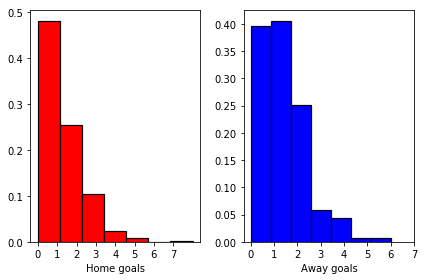

In [4]:
fig, ax = plt.subplots(1,2)

ax[0].hist(datos_liga['FTHG'], color='red', bins=7, density=True, edgecolor='black', linewidth=1.2)
ax[0].set_xlabel('Home goals')
ax[0].set_xticks([0,1,2,3,4,5,6,7])
ax[0].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

ax[1].hist(datos_liga['FTAG'], color='blue', bins=7, density=True, edgecolor='black', linewidth=1.2)
ax[1].set_xlabel('Away goals')
ax[1].set_xticks([0,1,2,3,4,5,6,7])
ax[1].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

fig.tight_layout()

print('Media Goles Home Team = {:.4f} +- {:.4f}'.format(np.mean(datos_liga['FTHG']), np.std(datos_liga['FTHG'])))
print('Media Goles Away Team = {:.4f} +- {:.4f}'.format(np.mean(datos_liga['FTAG']), np.std(datos_liga['FTAG'])))

In [5]:
datos_liga['FTR'].value_counts()

H    168
D    110
A    102
Name: FTR, dtype: int64

Media Corners Home Team = 5.5737 +- 2.8391
Media Corners Away Team = 4.0211 +- 2.3496


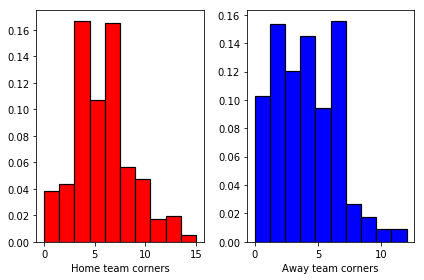

In [6]:
fig, ax = plt.subplots(1,2)

ax[0].hist(datos_liga['HC'], color='red', density=True, edgecolor='black', linewidth=1.2)
ax[0].set_xlabel('Home team corners')
# ax[0].set_xticks([0,1,2,3,4,5,6,7])
# ax[0].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

ax[1].hist(datos_liga['AC'], color='blue', density=True, edgecolor='black', linewidth=1.2)
ax[1].set_xlabel('Away team corners')
# ax[1].set_xticks([0,1,2,3,4,5,6,7])
# ax[1].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

fig.tight_layout()

print('Media Corners Home Team = {:.4f} +- {:.4f}'.format(np.mean(datos_liga['HC']), np.std(datos_liga['HC'])))
print('Media Corners Away Team = {:.4f} +- {:.4f}'.format(np.mean(datos_liga['AC']), np.std(datos_liga['AC'])))

## Estadisticas por jornada (cada 10 partidos)

In [ ]:
indexes = [np.array(list(int(i/10) for i in range(380))),
           np.array(list(i for i in range(380)))]

In [ ]:
datos_liga_multi = datos_liga.copy()
datos_liga_multi.index = indexes

In [ ]:
datos_liga_multi.index.names = ['Jornada', 'Partido']

In [ ]:
datos_liga_multi.head(3)

In [ ]:
chunck = 0
datos_liga_multi.loc[(slice('0'), slice(None)), :]

# Creo feature de predicho bien o predicho mal, y un peso

In [ ]:
h = datos_liga['FTHG'][0]
a = datos_liga['FTAG'][0]
bh = datos_liga['B365H'][0]
bd = datos_liga['B365D'][0]
ba = datos_liga['B365A'][0]
print(h, a, bh, bd, ba)

In [ ]:
dif = h - a
masprob = np.argsort([bh, bd, ba])
print(dif, masprob)

In [ ]:
new = datos_liga[['FTHG', 'FTAG', 'B365H', 'B365D', 'B365A']]
new_feature = []
for i in range(len(new)):
    h = new['FTHG'][i]
    a = new['FTAG'][i]
    bh = new['B365H'][i]
    bd = new['B365D'][i]
    ba = new['B365A'][i]
    dif = h - a
    masprob = np.argsort([bh, bd, ba])
    difbet = bh/ba
    if dif<0:
        if masprob[0]!=2:
            new_feature.append(0)
        elif masprob[0]==2:
            new_feature.append(1)
    elif dif>0:
        if masprob[0]!=0:
            new_feature.append(1)
        elif masprob[0]==0:
            new_feature.append(0)
    else:
        new_feature.append(0)

In [ ]:
new_feature = np.array(new_feature)

In [ ]:
len(new_feature[new_feature==0]), len(new_feature[new_feature==1])

# Betting strategies

## Bet for the most probable always

my_features = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HC', 'AC', 
               'B365H', 'B365D', 'B365A']

In [7]:
accuracy = 0
profits = 0
for i in range(len(datos_liga)):
    if (datos_liga['FTR'][i] == 'H') and (datos_liga['B365H'][i] < datos_liga['B365A'][i]):
        accuracy += 1
        profits += (datos_liga['B365H'][i])
        
    if (datos_liga['FTR'][i] == 'A') and (datos_liga['B365A'][i] < datos_liga['B365H'][i]):
        accuracy += 1
        profits += (datos_liga['B365A'][i])
        
    if datos_liga['B365A'][i] == datos_liga['B365H'][i]:
        print('Misma probabilidad!')
    
print(' ')
print('Accuracy = {}'.format(accuracy/len(datos_liga)))
print('Profits = {}'.format(profits))
print('Win (+ or lost -) = ', profits-len(datos_liga))

Misma probabilidad!
Misma probabilidad!
Misma probabilidad!
Misma probabilidad!
 
Accuracy = 0.48157894736842105
Profits = 326.33000000000015
Difference =  -53.669999999999845


## Model: Keras built on top of TensorFlow
### y_true (the labels):
 * Win Home
 * Win Away
 * Draw
 * No bet

In [8]:
def odds_loss(y_true, y_pred):
    """
    The function implements the custom loss function
    
    -Inputs
    true : a vector of dimension batch_size, 7.
           A label encoded version of the output and the backp1_a and backp1_b
    pred : a vector of probabilities of dimension batch_size , 5.
    
    -Returns 
    the loss value
    """
    
    win_home = y_true[:, 0:1]
    win_away = y_true[:, 1:2]
    draw = y_true[:, 2:3]
    no_bet = y_true[:, 3:4]
    
    odds_a = y_true[:, 4:5]
    odds_b = y_true[:, 5:6]
    
    gain_loss_vector = K.concatenate([win_home * (odds_a - 1) + (1 - win_home) * -1,
                                      win_away * (odds_b - 1) + (1 - win_away) * -1,
                                      draw * (1/(1 - 1/odds_a - 1/odds_b) - 1) + (1 - draw) * -1,
                                      K.zeros_like(odds_a)], axis=1)

    return -1 * K.mean(K.sum(gain_loss_vector * y_pred, axis=1))

In [9]:
data = pd.read_csv('Datos/2018-2019.1eraDivision(FT,HTresults;matchstats;match,totalgoals,AHodds).csv')
my_features = ['HomeTeam', 'AwayTeam', 'B365H', 'B365A', 'FTR']
data = data[my_features]

In [35]:
data.head()

,HomeTeam,AwayTeam,B365H,B365A,FTR
0,Betis,Levante,1.66,5.0,A
1,Girona,Valladolid,1.75,5.0,D
2,Barcelona,Alaves,1.11,21.0,H
3,Celta,Espanol,1.85,4.5,D
4,Villarreal,Sociedad,2.04,3.8,A


In [28]:
data['HomeTeam'].unique()

array(['Betis', 'Girona', 'Barcelona', 'Celta', 'Villarreal', 'Eibar',
       'Real Madrid', 'Vallecano', 'Ath Bilbao', 'Valencia', 'Getafe',
       'Leganes', 'Alaves', 'Ath Madrid', 'Valladolid', 'Espanol',
       'Sevilla', 'Levante', 'Huesca', 'Sociedad'], dtype=object)

### New features, fifa scores by months

In [24]:
team_scores = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1819.csv')

In [29]:
team_scores['Team'].unique()

array(['FC Barcelona', 'Real Madrid', 'Atlético Madrid', 'Valencia CF',
       'Villarreal CF', 'Real Betis', 'Athletic Club', 'Sevilla FC',
       'SD Eibar', 'RC Celta', 'Real Sociedad', 'Getafe CF',
       'RCD Espanyol', 'Girona FC', 'Levante UD', 'D. Alavés',
       'CD Leganés', 'SD Huesca', 'Rayo Vallecano', 'R. Valladolid CF'],
      dtype=object)

In [34]:
team_scores.columns

Index(['Team', 'Date', 'ATT', 'MID', 'DEF', 'OVR'], dtype='object')

In [10]:
def get_data():
    data = pd.read_csv('Datos/2018-2019.1eraDivision(FT,HTresults;matchstats;match,totalgoals,AHodds).csv')
    my_features = ['HomeTeam', 'AwayTeam', 'B365H', 'B365A', 'FTR']
    data = data[my_features]

    X = data.values[:, 2:-1]
    y = data.values[:, -1]
    y_full = np.zeros((X.shape[0], 5))
    for i, y_i in enumerate(y):
        if y_i == 'H':
            y_full[i, 0] = 1.0
        if y_i == 'A':
            y_full[i, 1] = 1.0
        if y_i == 'D':
            y_full[i, 2] = 1.0

        y_full[i, 3] = X[i, -2] # ODDS OF HOME TEAM
        y_full[i, 4] = X[i, -1] # ODDS OF AWAY TEAM
    return X, y_full, y

In [11]:
from sklearn.model_selection import train_test_split

X, y, outcome = get_data()
train_x, test_x, train_y, test_y, = train_test_split(X,  y) # SPLIT THE DATA IN TRAIN AND TEST DATASET.

In [12]:
from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras import backend as K

def get_model(input_dim, output_dim, base=1000, multiplier=0.25, p=0.2):
    inputs = Input(shape=(input_dim,))
    l = BatchNormalization()(inputs)
    l = Dropout(p)(l)
    n = base
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    l = BatchNormalization()(l)
    l = Dropout(p)(l)
    n = int(n * multiplier)
    l = Dense(n, activation='relu')(l)
    outputs = Dense(output_dim, activation='softmax')(l)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='Nadam', loss=odds_loss)
    return model

from keras.callbacks import EarlyStopping, ModelCheckpoint

model = get_model(2, 2, 1000, 0.9, 0.7)
history = model.fit(train_x, train_y, 
                    validation_data = (test_x, test_y),
                    epochs = 20, 
                    batch_size = 5, 
                    callbacks = [EarlyStopping(patience=25),
                                 ModelCheckpoint('odds_loss.hdf5',
                                                 save_best_only=True)]
                   )

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 285 samples, validate on 95 samples
Epoch 1/20
285/285 [==============================] - 4s 15ms/step - loss: -1.0516 - val_loss: -1.7843
Epoch 2/20
285/285 [==============================] - 3s 9ms/step - loss: -1.5032 - val_loss: -1.7357
Epoch 3/20
285/285 [==============================] - 2s 9ms/step - loss: -1.3837 - val_loss: -1.7357
Epoch 4/20
285/285 [==============================] - 2s 9ms/step - loss: -1.6774 - val_loss: -1.7357
Epoch 5/20
285/285 [==============================] - 2s 9ms/step - loss: -1.6785 - val_loss: -1.7357
Epoch 6/20
285/285 [==============================] - 3s 9ms/step - loss: -1.6786 - val_loss: -1.7357
Epoch 7/20
285/285 [==============================] - 3s 9ms/step - loss: -1.6785 - val_loss: -1.7357
Epoch 8/20
285/285 [==============================] - 3s 9ms/step - loss: -1.6785 - val_loss: -1.7357
Epoch 9/20
285/285

In [17]:
print('Training Loss : {}\nValidation Loss : {}'.format(model.evaluate(train_x, train_y), 
                                                        model.evaluate(test_x, test_y)))

95/95 [==============================] - 0s 357us/step
Training Loss : -1.6784561378914014
Validation Loss : -1.7356841175179734


In [22]:
print(model.predict_classes(test_x))
print(test_y)

AttributeError: 'Model' object has no attribute 'predict_classes'